In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [2]:
x_values = np.array([3, 5, 7, 9, 11])
y_values = np.array([13.2, 17.5, 21.0, 25.9, 29.1])

##### Create column matrix and calculate least squares regression.
We can actually use a numpy function to create column which we use as A=X.

In [3]:
A = np.column_stack((x_values, np.ones(len(x_values))))

In [4]:
coefficients = np.linalg.lstsq(A, y_values, rcond=None)  # Use numpy function
a1, a2 = coefficients[0]  # Unpack values

print(f"Slope = {a1:.4f}")
print(f"Intercept = {a2:.4f}")  # Specifying decimal places of our float

Slope = 2.0100
Intercept = 7.2700


#### Build a fitted line for plotting
Here we just create a bunch of x values based on data and apply estimation function to y values.

In [5]:
x_fitted = np.linspace(x_values.min(), x_values.max(), 200)
y_fitted = a1 * x_fitted + a2

#### Plot the data and fitted line along with normal customizations
The only notable part here is that we make sure to plot original data, so we can see quality of our model. "r" just indicates we want a raw string so python will treat "\backslash" literally.

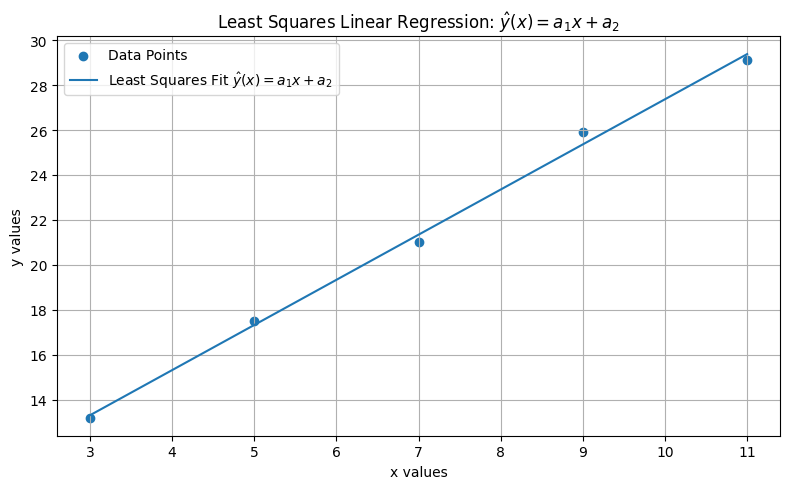

In [10]:
plt.figure(figsize=(8,5))

plt.scatter(x_values, y_values, marker="o", label="Data Points")  # Marker just

plt.plot(x_fitted, y_fitted, label=r"Least Squares Fit $\hat{y}(x) = a_1 x + a_2$")

plt.xlabel("x values")
plt.ylabel("y values")
plt.title(r"Least Squares Linear Regression: $\hat{y}(x) = a_1 x + a_2$")  # We can actually use LaTex!
plt.legend()
plt.grid(True)
plt.tight_layout()  # Centers the figure
plt.show()

#### This looks pretty good!
There isn't a lot of data, so the model is not very accurate, but it's still a good fit.

#### Define f(x) and its derivative as functions.
I think it would be more interesting to use a function from package or create one to determine derivatives.

In [15]:
f_x = lambda x: np.cos(x) / x
deriv_f = lambda x: (-x * np.sin(x) - np.cos(x)) / x**2

#### Implement Newton-Raphson Method
In this case, we implement this recursively. The key here is the newton step. It would be a good idea to implement an iteration version as well.

In [16]:
def newton_raphson(f, f_prime, x_0, tol=1e-6, curr_k=0):
    if f_prime == 0:  # Just safety net
        raise ZeroDivisionError("Derivative is zero")

    if abs(f(x_0)) < tol:
        return x_0, f, f_prime, curr_k
    else:
        curr_k += 1
        return newton_raphson(f, f_prime, x_0 - f(x_0) / deriv_f(x_0), tol, curr_k)

##### Test the function implementation and compare with fsolve.
Global and local variables like this can get messy. Usually defining these values via classes would look better.

In [17]:
x_0 = 1.5

root, f, f_prime, k = newton_raphson(f_x, deriv_f, x_0)

root_fsolve = fsolve(f_x, x_0)[0]  # Only estimate

print(f"Initial guess x0          = {x_0}\n")
print(f"Newton–Raphson root       = {root:.12f}\n")
print(f"Iterations to error < tolerance   = {k}\n")
print(f"f(root_NR)                = {f(root):.3e}\n")
print(f"scipy.optimize.fsolve root = {root_fsolve:.12f}\n")
print(f"|NR - fsolve|             = {abs(root - root_fsolve):.3e}\n")


Initial guess x0          = 1.5

Newton–Raphson root       = 1.570796326772

Iterations to error < tolerance   = 3

f(root_NR)                = 1.479e-11

scipy.optimize.fsolve root = 1.570796326795

|NR - fsolve|             = 2.323e-11



##### Plot the function and the NR root.
The axhline part helps us visual the intercept at 0.

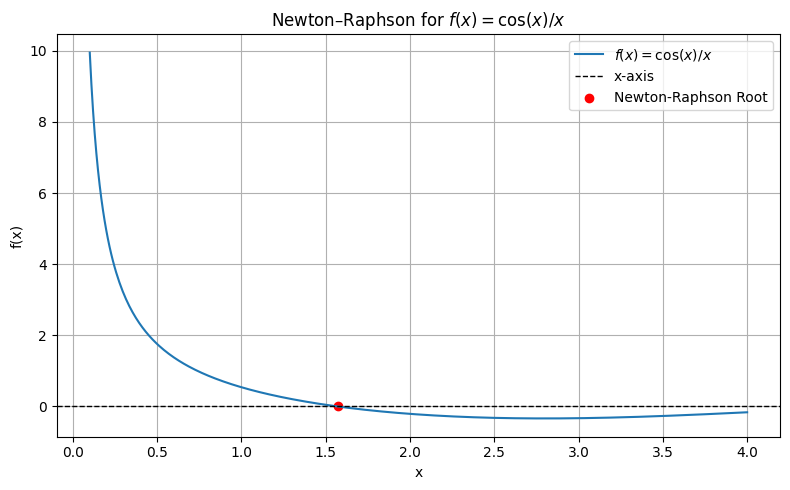

In [18]:
x_vals = np.linspace(0.1, 4.0, 400)
y_vals = f(x_vals)

plt.figure(figsize=(8,5))

plt.plot(x_vals, y_vals, label=r"$f(x) = \cos(x)/x$")

plt.axhline(0, color="black", linestyle="--", linewidth=1, label="x-axis")

plt.scatter([root], [f(root)], color="red", label="Newton-Raphson Root")

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title(r"Newton–Raphson for $f(x) = \cos(x)/x$")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### This looks great! It seems like our approximation of the root using NR is pretty accurate.